#### 공공데이터 분석
- 분석하려는 것 : 2018.4-9 ~ 2023.4-9의 농업용 전기 사용량과 판매단가에 따른 전기 요금평균?
- 엑셀기준 4~11 열의 데이터만 추출해서 사용
- 여차하면 본 데이터에서 날리자 ^^

In [1]:
# 필요한 모듈과 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [2]:
# 데이터 불러오기
def read_data(file_path):
    idx_list = [x for x in range(0, 6, 1)]
    data_df = pd.read_excel(file_path, skiprows=[0, 1, 2])
    data_df = data_df.iloc[idx_list, :]
    data_df = data_df.drop(columns=['시구', '시군구', '계약구분'])

    # trans_col = ['고객호수(호)', '사용량(kWh)', '전기요금(원)', '평균판매단가(원/kWh)']
    # for col in trans_col:
    #     data_df[col] = data_df[col].str.strip()
    #     data_df[col] = data_df[col].str.replace(',', '')
    #     if col == '평균판매단가(원/kWh)':
    #         data_df[col] = data_df[col].astype('float')
    #     else:
    #         data_df[col] = data_df[col].astype('int')

    # data_df.info()
    data_df = data_df.set_index('년월').T
    return data_df

In [3]:
m_2018_df = read_data('./data/month_2018.xlsx')
m_2019_df = read_data('./data/month_2019.xlsx')
m_2020_df = read_data('./data/month_2020.xlsx')
m_2021_df = read_data('./data/month_2021.xlsx')
m_2022_df = read_data('./data/month_2022.xlsx')
m_2023_df = read_data('./data/month_2023.xlsx')

In [4]:
m_2023_df

년월,202304,202305,202306,202307,202308,202309
고객호수(호),697508,1940068,1944171,1947574,1952404,1956171
사용량(kWh),520869479,1263867071,1351487286,1355733975,1730530588,1677436585
전기요금(원),39615068873,96941425957,104957182879,108713568986,134600415797,129979875546
평균판매단가(원/kWh),76.1,76.7,77.7,80.2,77.8,77.5


In [5]:
int(m_2023_df.loc['전기요금(원)', '202304'])     # 숫자가 너무 큰지.. e로 나오는데 뽑으면 또 잘 나옴.

39615068873

In [22]:
from matplotlib.ticker import ScalarFormatter

In [52]:
def draw_graph(data_df, year):
    # 그래프 그리기
    label_list = m_2018_df.index.to_list()
    xticks_list = m_2018_df.columns.to_list()

    # 그래프가 너무 안보이니까 subplot을 그리자
    fig = plt.figure(figsize=(20, 9))
    axes = fig.subplots(2, 2, sharex=True)

    for row in range(2):
        for col in range(2):
            idx = row * 2 + col
            for i in range(6):
                axes[row, col].plot(xticks_list, data_df.loc[label_list[idx], :], 'ro-')
                
                # axes[row, col].set_xlabel('2018')
                axes[row, col].set_ylabel(label_list[idx])
                # axes[row, col].set_ylim(m_2018_df.loc[label_list[idx]].min(), m_2018_df.loc[label_list[idx]].max())
                axes[row, col].set_xticks(np.arange(0, 6, 1), ['4월', '5월', '6월', '7월', '8월', '9월'])
                axes[row, col].set_title(f"농업, 임업 및 어업별 {label_list[idx]}", fontsize=14)
                # axes[row, col].legend()
                
                # y축의 범위를 e가 안나오게
                axes[row, col].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
                axes[row, col].ticklabel_format(style='plain', axis='y')
                
                # 값을 표시
                for j, value in enumerate(data_df.loc[label_list[idx], :]):
                    axes[row, col].text(j, value, f'{value:,}', ha='center', va='top')
    title = f'{year}년 농업, 임업 및 어업별 전력 사용량'         
    fig.suptitle(title, fontsize=20)
    plt.savefig('./image/' + title + '.png', dpi=100)
    plt.show()
    plt.close()

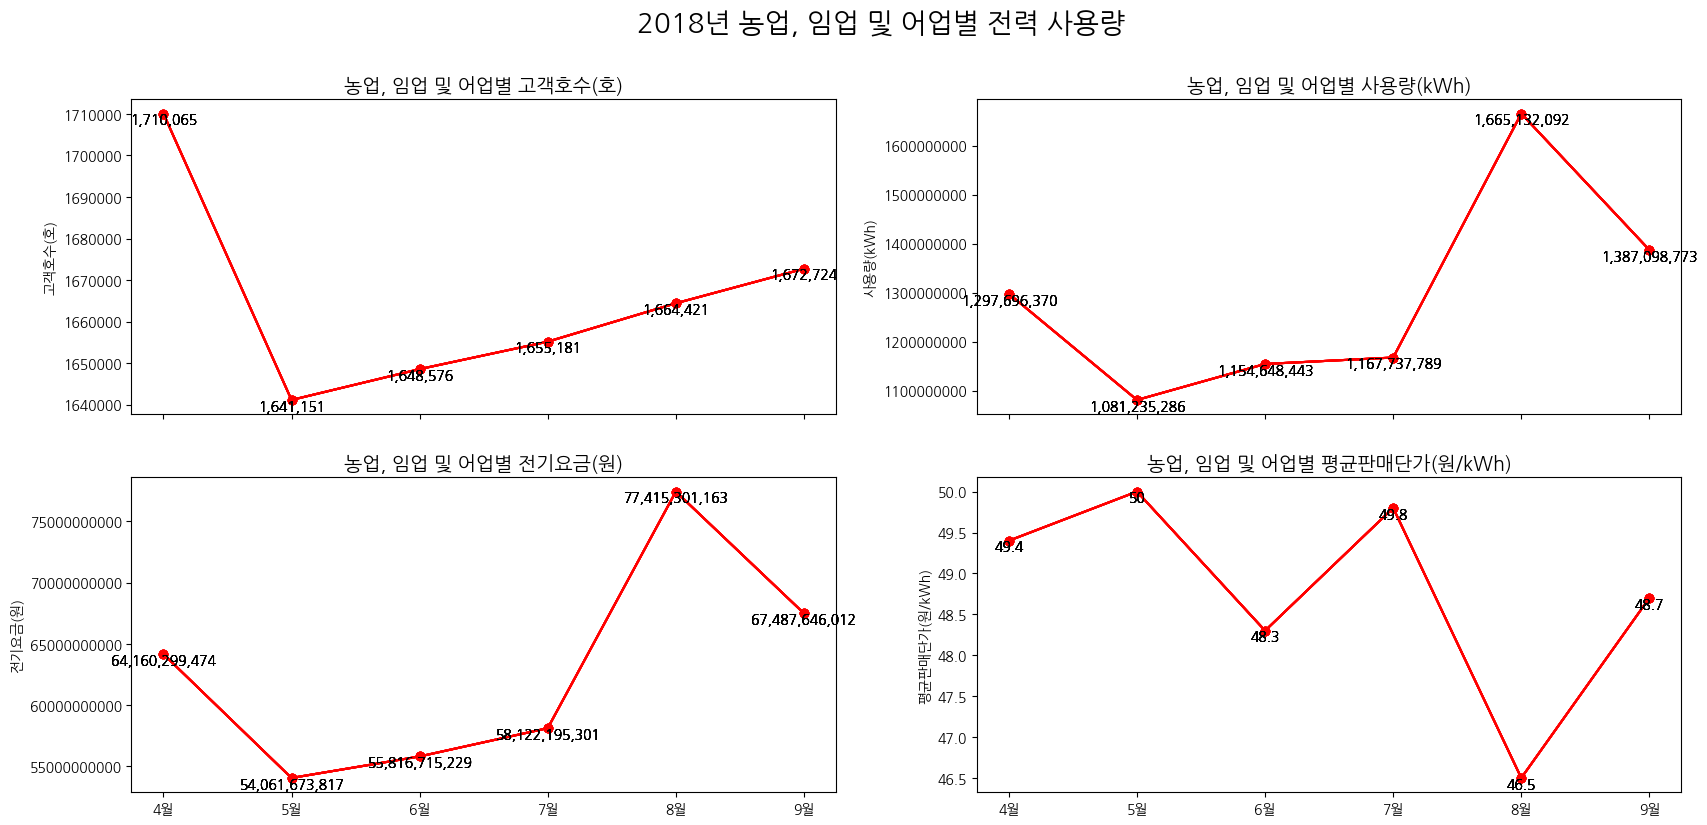

In [53]:
draw_graph(m_2018_df, 2018)

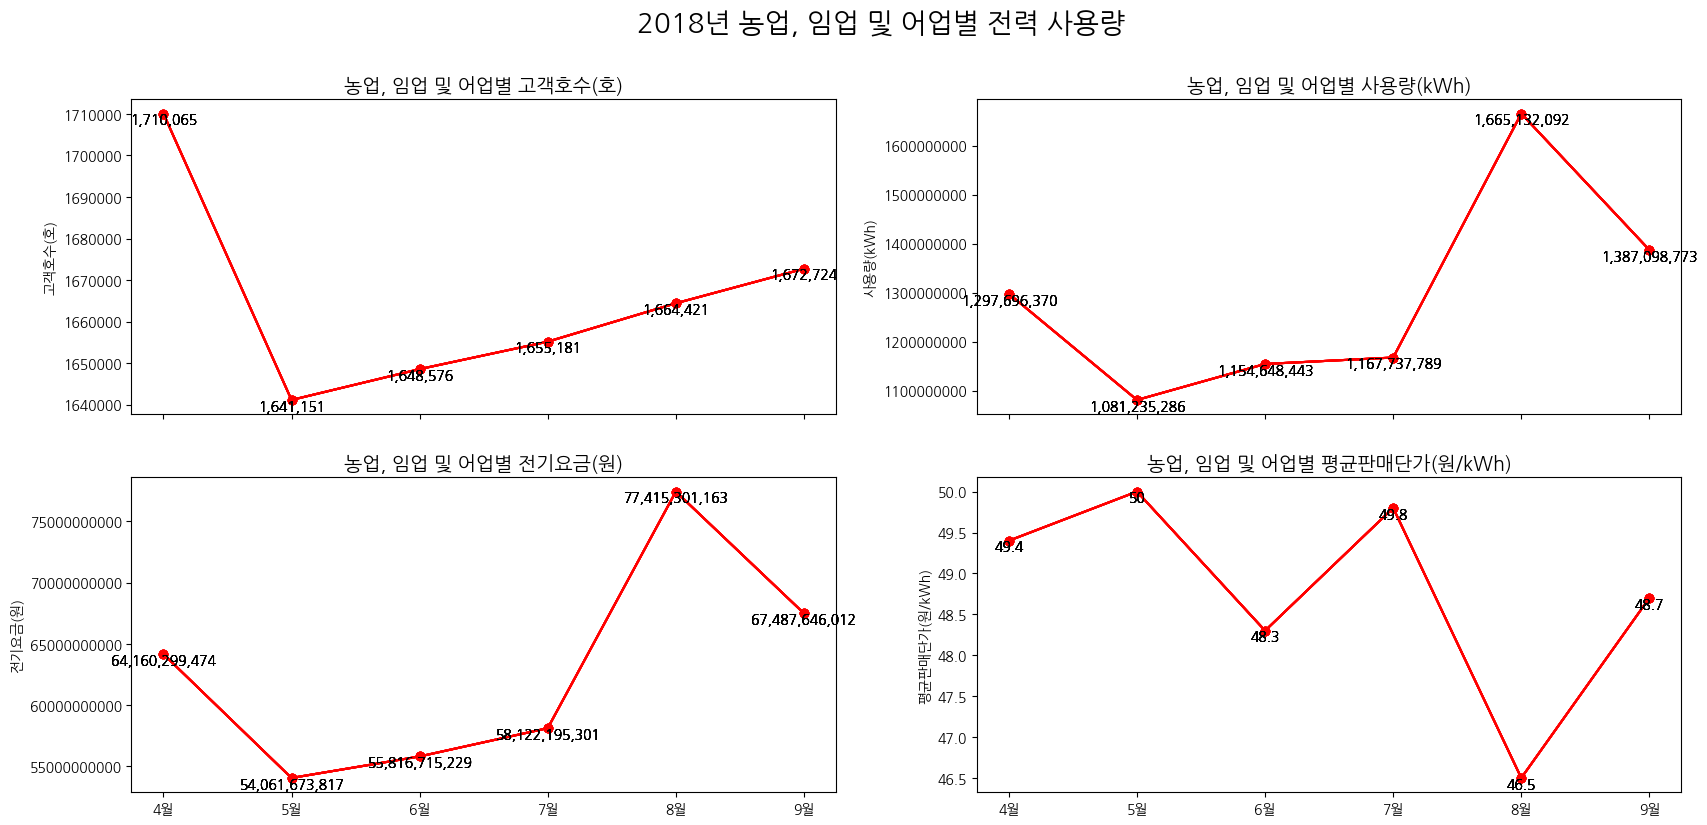

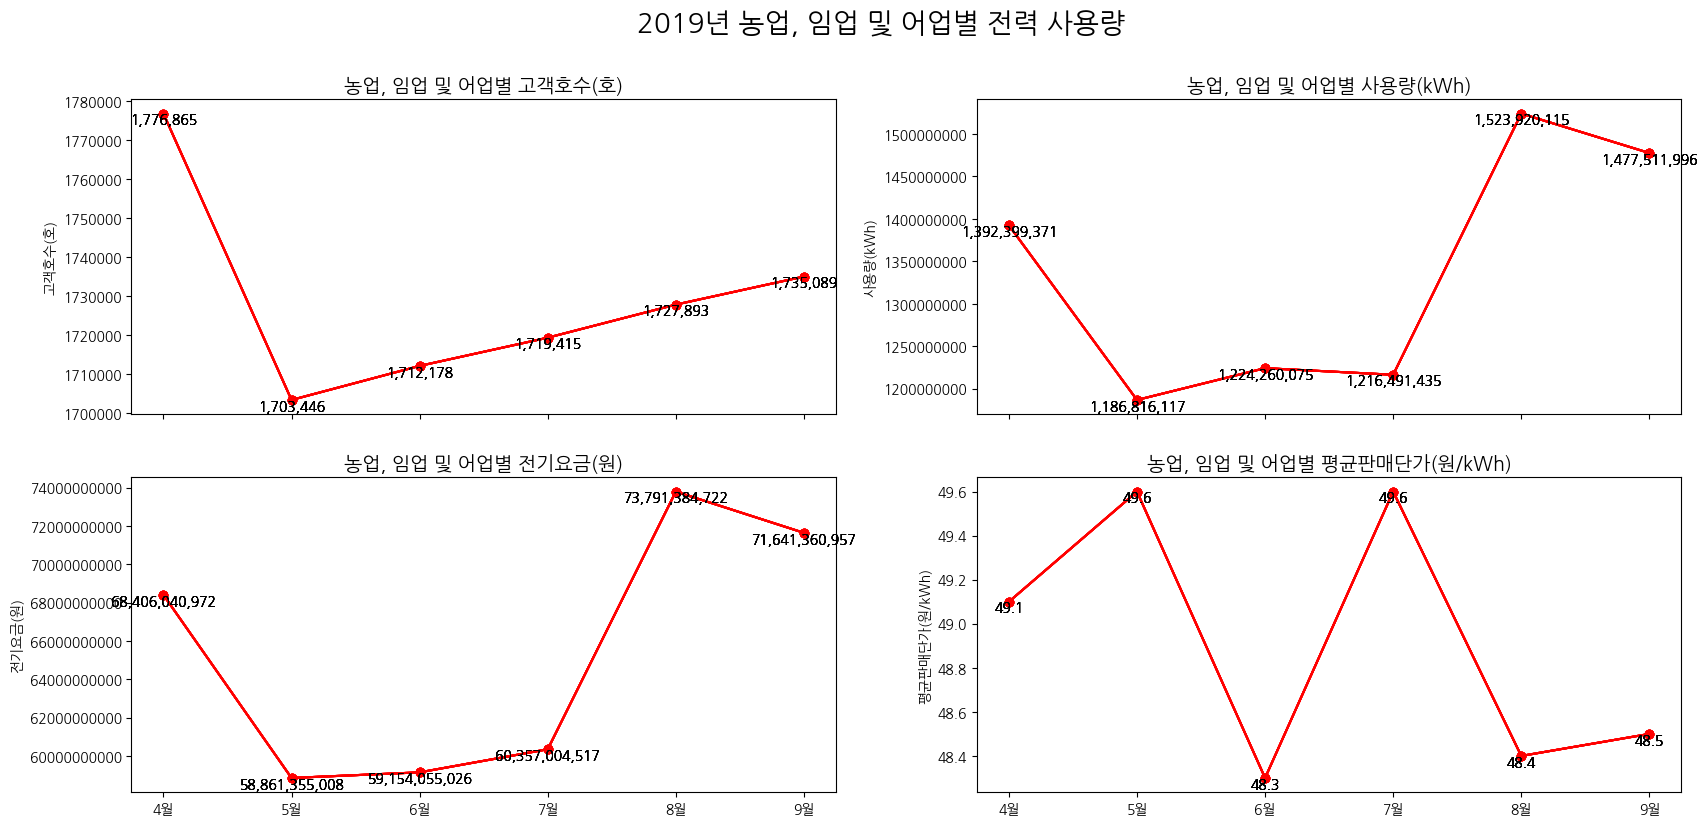

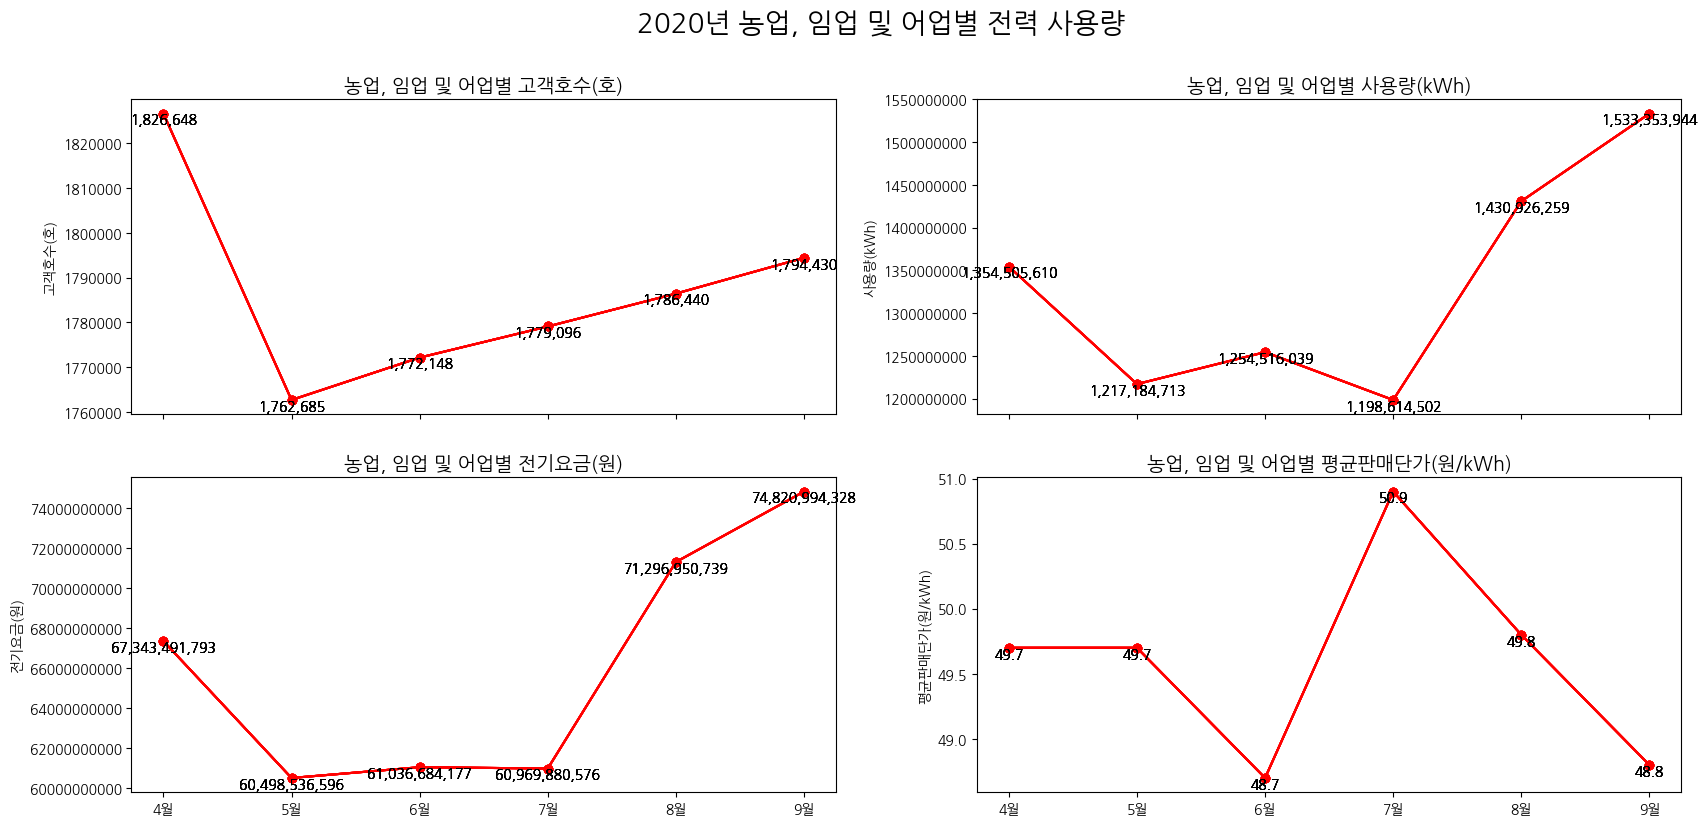

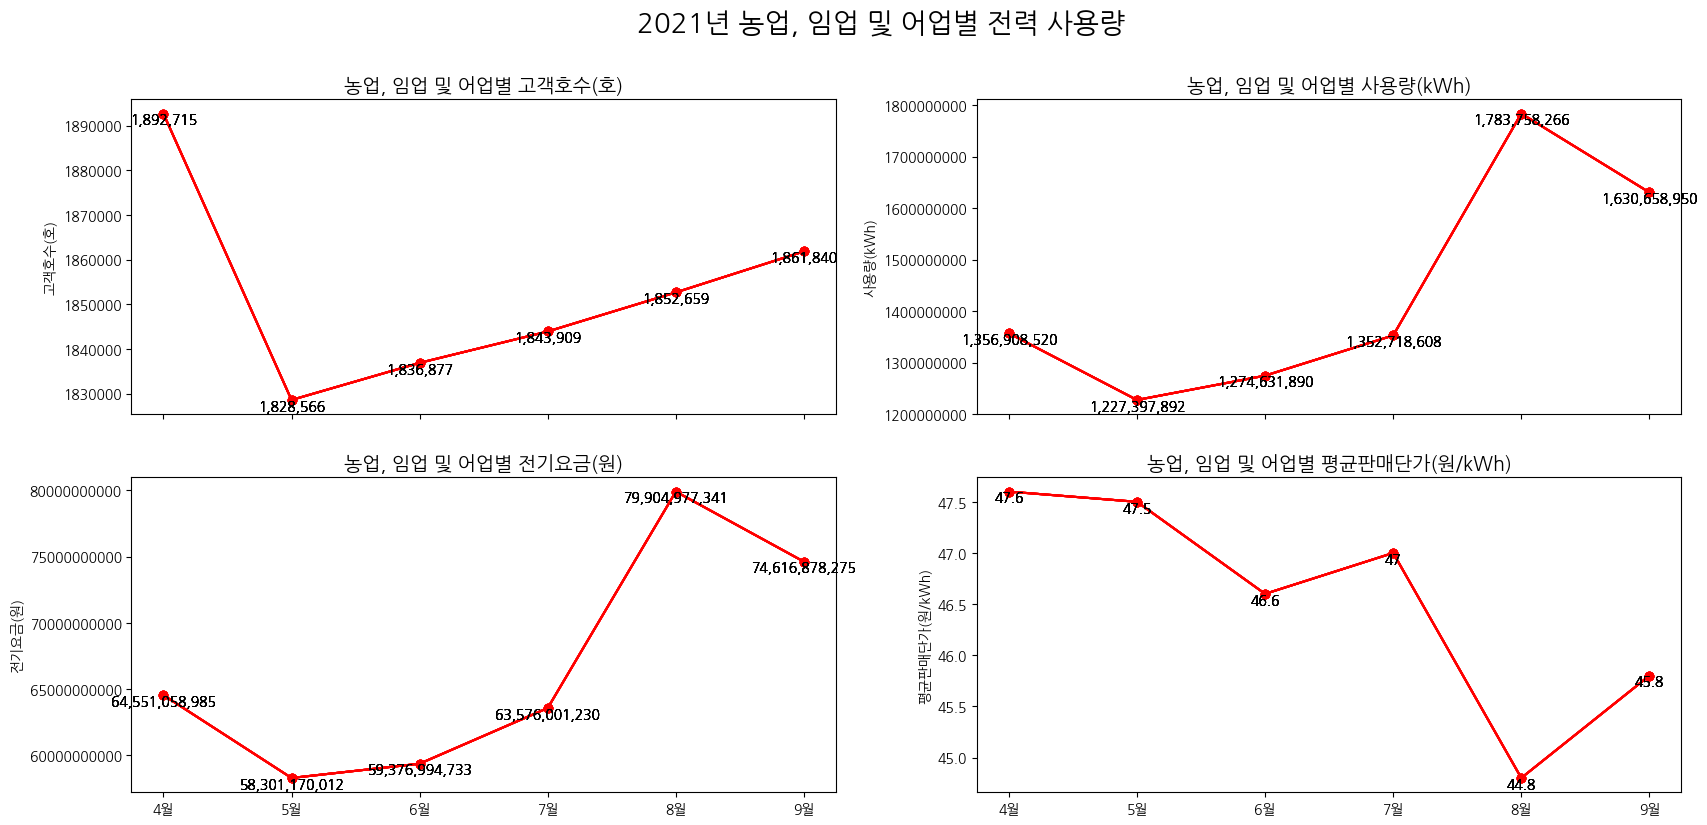

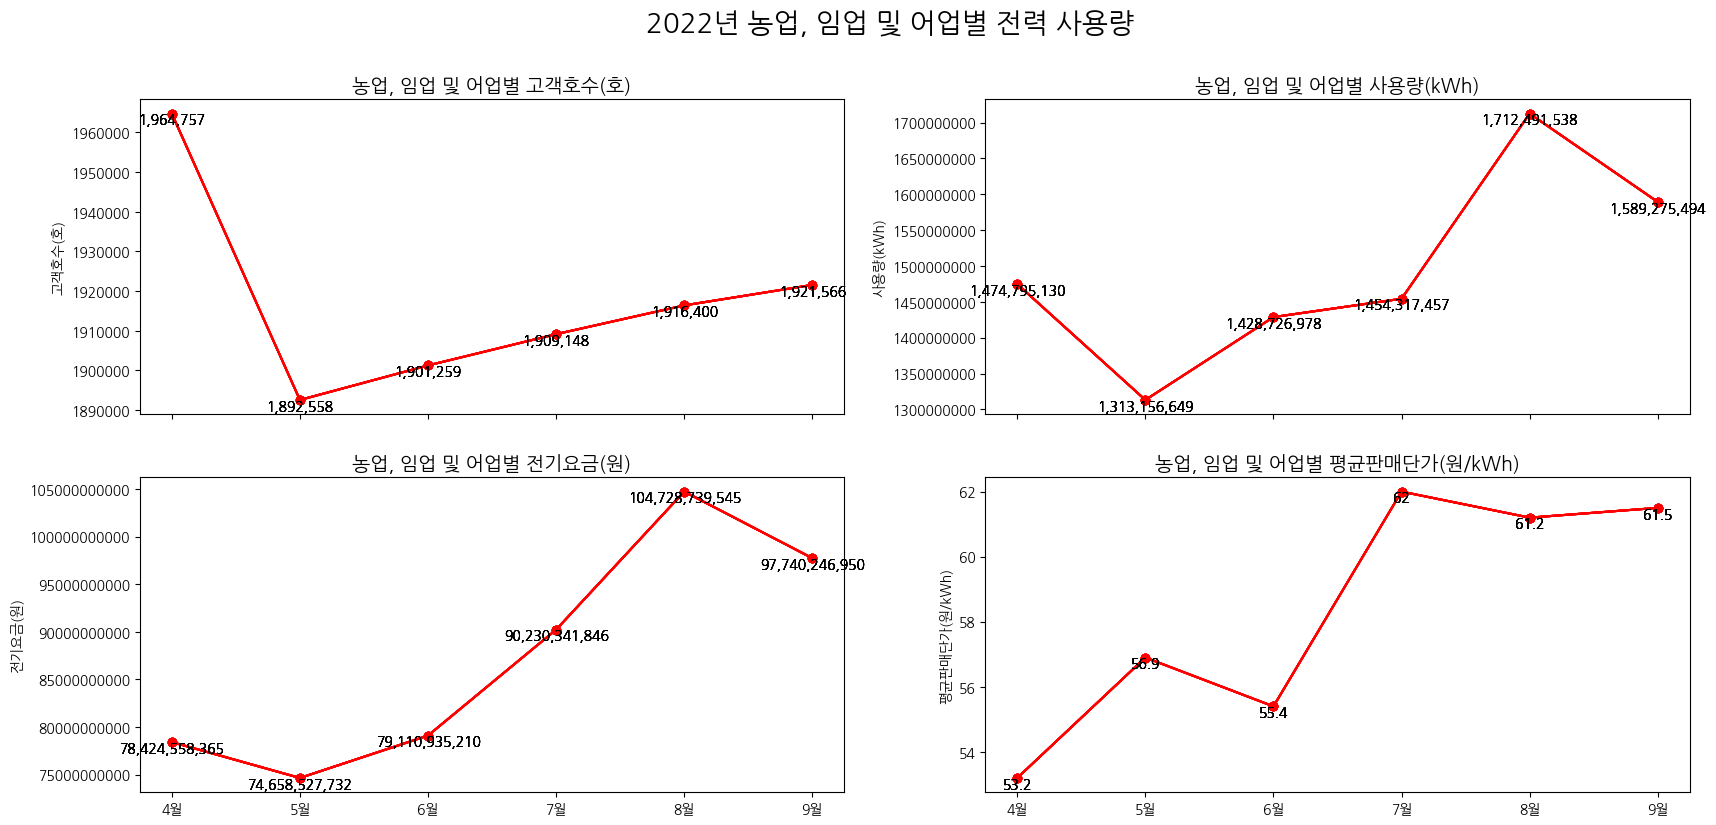

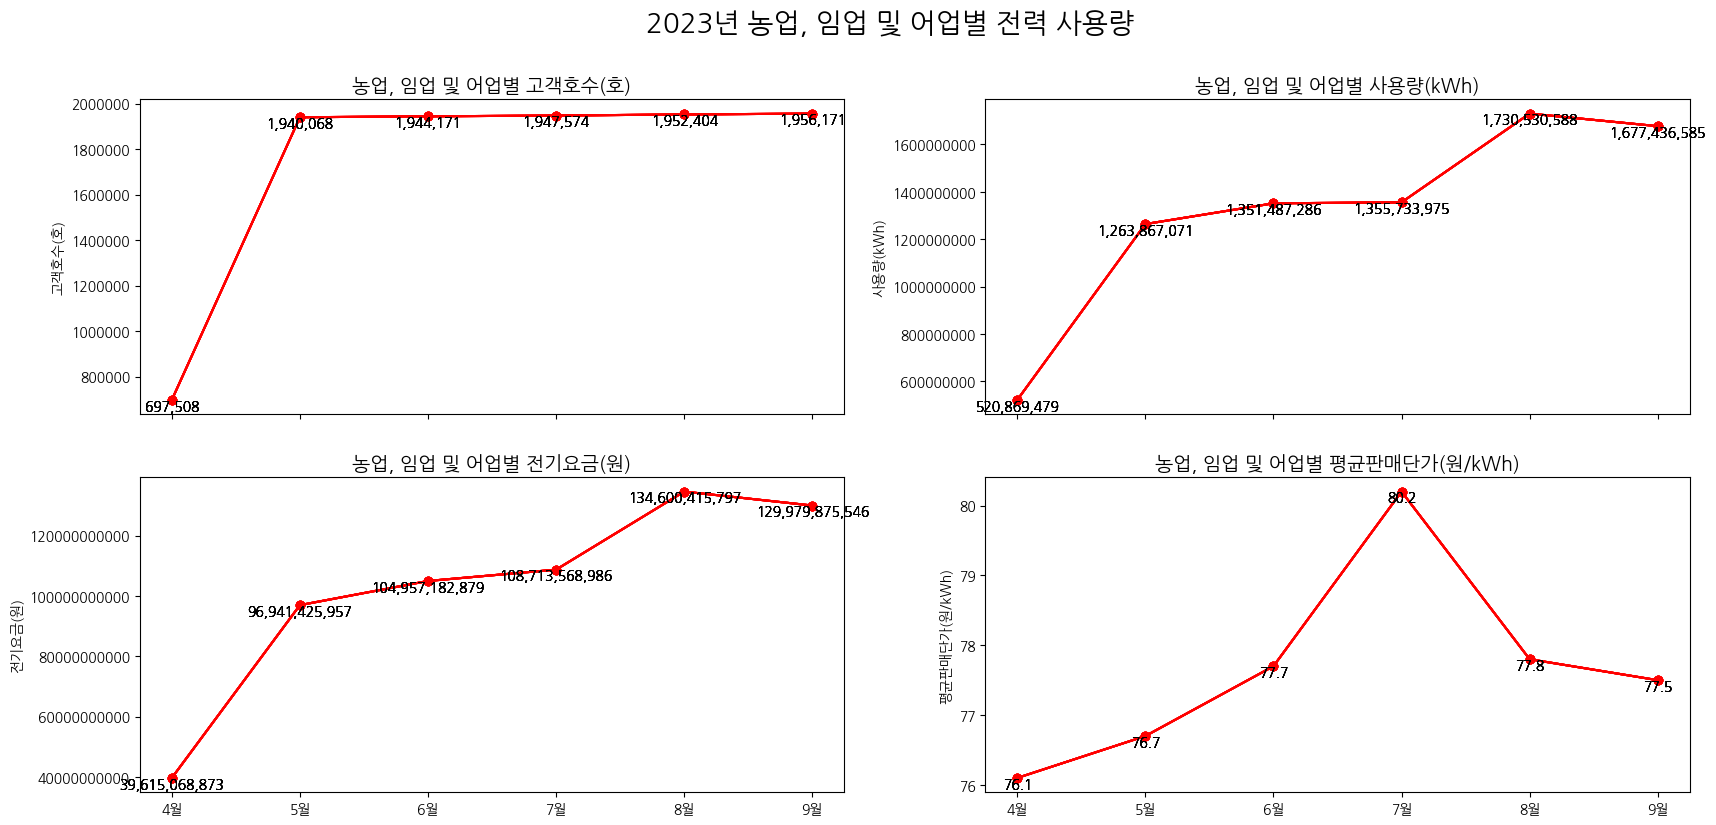

In [54]:
data_list = [m_2018_df, m_2019_df, m_2020_df, m_2021_df, m_2022_df, m_2023_df]
year_list = [2018, 2019, 2020, 2021, 2022, 2023]

for i in range(len(data_list)):
    draw_graph(data_list[i], year_list[i])